# Who would you listen to?: A Frequent Itemset Mining and Recommender System approach on the Million Song Dataset

In [1]:
import pandas as pd
import random
import sqlite3

## Reading the files

In [2]:
# Pandas
df_train = pd.read_csv('/mnt/data/public/millionsong/taste/train_triplets.txt',
                 delimiter='\t', usecols=[0, 1, 2],
                    names=['user_id', 'song_id', 'play_count'], index_col='song_id')

In [14]:
#Connecting to tracks_metadata.db for other information
conn = sqlite3.connect('/mnt/data/public/millionsong/AdditionalFiles/track_metadata.db')
c = conn.cursor()

In [13]:
tracks_db = pd.read_sql('''Select * from songs''', conn).set_index('song_id')

In [104]:
orig_table = pd.merge(df_train, tracks_db[['artist_id']], left_index=True, right_index=True, how='left')

## EDA

In [130]:
filtered = orig_table_a[orig_table_a['play_count']>1]
filtered = filtered.groupby(['user_id','artist_id'])['play_count'].sum()

Text(0, 0.5, 'Frequency')

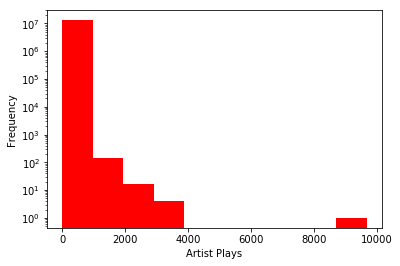

In [131]:
fig, ax  = plt.subplots()
ax.set_yscale('log')
ax.hist(filtered, color='red')
ax.set_xlabel("Artist Plays")
ax.set_ylabel("Frequency")

In [16]:
orig_table.reset_index(drop=True, inplace=True)

In [17]:
orig_table = orig_table[orig_table['play_count']>1]

In [18]:
orig_table = orig_table.groupby(['user_id', 'artist_id'])['play_count'].sum()

In [19]:
orig_table = orig_table.reset_index()

In [20]:
orig_table.head()

,user_id,artist_id,play_count
0,00000b722001882066dff9d2da8a775658053ea0,ARC07PP1187B9B49E9,2
1,00001638d6189236866af9bbf309ae6c2347ffdc,AR2DGPY1187FB4CECF,2
2,00001638d6189236866af9bbf309ae6c2347ffdc,AR5JPWN1187FB5B6DE,2
3,00001638d6189236866af9bbf309ae6c2347ffdc,AR9HFVQ1187FB4CF6B,31
4,00001638d6189236866af9bbf309ae6c2347ffdc,ARHUDAN1187B99251C,5


In [21]:
orig_table['play_count'].describe()

count    1.305552e+07
mean     8.626683e+00
std      1.730619e+01
min      2.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      8.000000e+00
max      9.667000e+03
Name: play_count, dtype: float64

In [22]:
orig_table['play_count'] = orig_table.play_count.apply(lambda x: 1 if x==2 else (2 if x<=4 else (3 if x<=8 else 4)))

In [132]:
sampled_users = np.random.choice(orig_table['user_id'].unique(), 10000, False)

In [133]:
sampled_table = orig_table[orig_table['user_id'].isin(sampled_users)]

## Train a recommender system for artists

In [168]:
from surprise import (Reader, Dataset, KNNWithMeans, SVDpp)
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# for k in range(2,1000,20):
knn = SVDpp()
reader = Reader(rating_scale=(1,4))
dataset = Dataset.load_from_df(sampled_table, reader)

trainset, testset = train_test_split(dataset, test_size=0.25)
predictions = knn.fit(trainset).test(testset)
rmse(predictions)

RMSE: 1.1036


1.1035538610400073

In [26]:
sampled_table.head()

,user_id,artist_id,play_count
27768,008cb410c22ad601c9b689bdaf66725b5a9107ed,AR1UR7X1187FB50596,2
27769,008cb410c22ad601c9b689bdaf66725b5a9107ed,AR35ZOY1187B98C79D,4
27770,008cb410c22ad601c9b689bdaf66725b5a9107ed,AR45CGR1187FB3BCC5,1
27771,008cb410c22ad601c9b689bdaf66725b5a9107ed,AR5MX2X1187FB3874F,1
27772,008cb410c22ad601c9b689bdaf66725b5a9107ed,AR65K7A1187FB4DAA4,1


In [192]:
top10users = sampled_table['user_id'].value_counts()[:10]

In [193]:
top10users

a15075a926c1998d91940f118342ba8356efc7d4    345
e5b1a35349132afe4f96dd6b39cdc4d94031eb1b    260
1d6cbd66794057c2e41c72500a628ae9609cd7bd    195
3f1037fb3a74f351cd61fff169a54896d2be06f9    144
74007a0653e621614f4924840c3105363daab7b5    142
19cf743325b4c048d1385bb00d2aa1c9d4f0dd68    138
10a426c4c969a2854bf2271a1e2836a014d85f9f    132
44e9fc0a19baae46454c4e42123ee2db628770cd    131
954db6d4c27e4ddafc92373722cf324bfb5f93ea    127
8639f738b6e581bf7f12a83e21443874a7b18f38    127
Name: user_id, dtype: int64

In [28]:
sampled_table

,user_id,artist_id,play_count
27768,008cb410c22ad601c9b689bdaf66725b5a9107ed,AR1UR7X1187FB50596,2
27769,008cb410c22ad601c9b689bdaf66725b5a9107ed,AR35ZOY1187B98C79D,4
27770,008cb410c22ad601c9b689bdaf66725b5a9107ed,AR45CGR1187FB3BCC5,1
27771,008cb410c22ad601c9b689bdaf66725b5a9107ed,AR5MX2X1187FB3874F,1
27772,008cb410c22ad601c9b689bdaf66725b5a9107ed,AR65K7A1187FB4DAA4,1
...,...,...,...
13044964,ffcd64564aba2a1eed8cb0afcbc313903261d542,ARVV61U1187FB4FC32,2
13044965,ffcd64564aba2a1eed8cb0afcbc313903261d542,ARVXU2X1187B9AE6D8,2
13044966,ffcd64564aba2a1eed8cb0afcbc313903261d542,ARXWEBP1187B99BF48,4
13044967,ffcd64564aba2a1eed8cb0afcbc313903261d542,ARYQES41187B9B960F,3


## Apply the trained model to artists that a user hasn't listened to

In [29]:
one_user_existing = sampled_table[sampled_table['user_id']==sampled_table.iloc[0,0]]

In [169]:
def missing_artists(user, rounded=True):
    untried_artists = sampled_table[~sampled_table['artist_id'].isin(
        sampled_table.loc[sampled_table['user_id']==user,
                          'artist_id'])]['artist_id'].unique()
    one_user_missing = pd.DataFrame(columns=one_user_existing.columns)
    for artist in untried_artists:
        one_user_missing = one_user_missing.append(pd.Series({'user_id':user,
                                   'artist_id':artist,
                                   'play_count':knn.predict(user, artist).est}),
                            ignore_index=True)
    if rounded:
        one_user_missing['play_count_round'] = one_user_missing['play_count'].round()
    return one_user_missing

In [170]:
conn2 = sqlite3.connect('/mnt/data/public/millionsong/AdditionalFiles/artist_term.db')
c = conn2.cursor()

In [171]:
artist_db = pd.read_sql('''SELECT * FROM artist_term''', conn2).set_index('artist_id')

In [172]:
artist_db.head()

,term
artist_id,
AR002UA1187B9A637D,garage rock
AR002UA1187B9A637D,country rock
AR002UA1187B9A637D,free jazz
AR002UA1187B9A637D,oi
AR002UA1187B9A637D,space rock


## Get the similarity of artists in genre

In [182]:
def get_dist(artist1, artist2):
    if artist1 in artist_db.index:
        genre1 = artist_db.loc[artist1]
    else:
        return 0
    
    if artist2 in artist_db.index:
        genre2 = artist_db.loc[artist2]
    else:
        return 0
    
    if type(genre1.term)!=str:
        gen1 = set(genre1.term.values)
    else:
        gen1 = {genre1.term}
        
    if type(genre2.term)!=str:
        gen2 = set(genre2.term.values)
    else:
        gen2 = {genre2.term}
    jac_sim = len(gen1.intersection(gen2)) / len(gen1.union(gen2))
#     print(len(gen1), len(gen2), len(gen1.intersection(gen2)), jac_sim)
    return jac_sim

In [194]:
sampled_table[sampled_table['user_id'].isin(top10users.index)]

,user_id,artist_id,play_count
833509,10a426c4c969a2854bf2271a1e2836a014d85f9f,AR0A9UD1187B9AC521,4
833510,10a426c4c969a2854bf2271a1e2836a014d85f9f,AR0AJG11187FB51EFC,2
833511,10a426c4c969a2854bf2271a1e2836a014d85f9f,AR0L04E1187B9AE90C,1
833512,10a426c4c969a2854bf2271a1e2836a014d85f9f,AR0XOGM1187B9B3754,3
833513,10a426c4c969a2854bf2271a1e2836a014d85f9f,AR190KO1187B9905EC,3
...,...,...,...
11709438,e5b1a35349132afe4f96dd6b39cdc4d94031eb1b,ARYW3V11187B99C8C9,1
11709439,e5b1a35349132afe4f96dd6b39cdc4d94031eb1b,ARZ3TJ01187B989C6E,3
11709440,e5b1a35349132afe4f96dd6b39cdc4d94031eb1b,ARZENOX1187B98A645,4
11709441,e5b1a35349132afe4f96dd6b39cdc4d94031eb1b,ARZQ1KI1187FB4E578,1


In [ ]:
genre_dist = pd.DataFrame(columns=['user_id', 'artist_id', 'sim', 'score'])

for user in top10users.index:
# for user in random.sample(sampled_table['user_id'].unique().tolist(), 10):
    one_user_existing = sampled_table[sampled_table['user_id']==user]
    one_user_missing = missing_artists(user)
    for i in range(1, 5):
        rating_missing_i = one_user_missing[one_user_missing['play_count_round']==i]
        rating_existing_i = one_user_existing[one_user_existing['play_count']==i]
        for artist in rating_missing_i['artist_id']:
            sim = rating_existing_i['artist_id'].apply(lambda x: get_dist(x, artist)).mean()
#             print(sim)
            genre_dist = genre_dist.append(pd.Series({'user_id':user,
                                   'artist_id':artist,
                                   'sim':sim,
                                   'score':i,
                                   'score_unrounded':knn.predict(user, artist).est}),
                            ignore_index=True)
#     print(user)
    genre_dist.to_pickle('sim_vs_score_artist_recom_to_a_user2.pickle')
#             break
#         break
#     break

In [ ]:
genre_dist2 = pd.DataFrame(columns=['user_id', 'artist_id', 'sim', 'score'])

for user in top10users.index:
# for user in random.sample(sampled_table['user_id'].unique().tolist(), 10):
    one_user_existing = sampled_table[sampled_table['user_id']==user]
    one_user_missing = missing_artists(user)
    for i in range(1, 5):
        rating_missing_i = one_user_missing[one_user_missing['play_count_round']==i]
        rating_existing_i = one_user_existing[one_user_existing['play_count']==i]
        for artist in rating_missing_i['artist_id']:
            sim = rating_existing_i['artist_id'].apply(lambda x: get_dist(x, artist)).mean()
#             print(user, artist)
            genre_dist2 = genre_dist.append(pd.Series({'user_id':user,
                                   'artist_id':artist,
                                   'sim':sim,
                                   'score':i,
                                    'score_unrounded':knn.predict(user, artist).est}),
                            ignore_index=True)
#     print(user)
    genre_dist.to_pickle('sim_vs_score_artist_recom_to_a_user.pickle')
#             break
#         break
#     break

In [178]:
genre_dist = pd.read_pickle('sim_vs_score_artist_recom_to_a_user.pickle')

## Genre similarity vs recommendation
We want to check whether the recommendation is solely based on the artists being on the same genre or not.

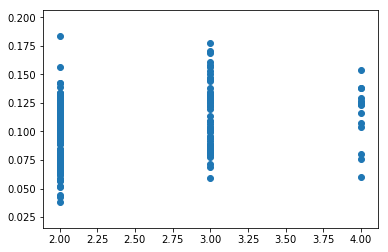

In [158]:
genre_dist_garage = genre_dist[genre_dist['artist_id'].isin(artist_db[artist_db['term']=='piano blues'].index)]
plt.scatter(genre_dist_garage['score'], genre_dist_garage['sim'])

The lack of a trend implies that the recommendation is not affected much by genre.

## Genre EDA

In [100]:
terms = artist_db.reset_index().groupby('term').count()
terms = terms[terms['artist_id']>25]

In [ ]:
# term_r2 = artist_db[artist_db.reset_index().groupby('term').count() > 25].index
for term in terms.index:
    genre_dist_garage = genre_dist[genre_dist['artist_id'].isin(artist_db[artist_db['term']==term].index)]
    genre_dist_garage['score'] = genre_dist_garage['score'].astype(float)
    terms.loc[term, 'r2'] = genre_dist_garage[['sim', 'score']].corr().iloc[0, 1]
#     print(term, genre_dist_garage[['sim', 'score']].corr().iloc[0, 1])

In [146]:
terms.sort_values('r2', ascending=False).head(20).rename(columns={'artist_id':'count'})

,count,r2
term,,
gramophone,27,0.875906
music chain,30,0.823022
fingerstyle,49,0.664757
gramusels bluesrock,53,0.621124
southern metal,32,0.619500
wop,47,0.599548
blackened thrash metal,31,0.583349
barturismooth,35,0.562917
country divas,30,0.522163


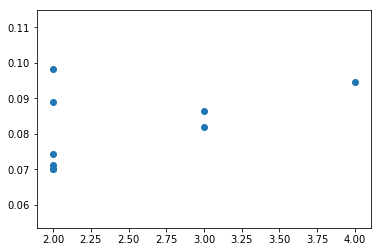

In [144]:
genre_dist_garage = genre_dist[genre_dist['artist_id'].isin(artist_db[artist_db['term']=='middle east'].index)]
plt.scatter(genre_dist_garage['score'], genre_dist_garage['sim'])

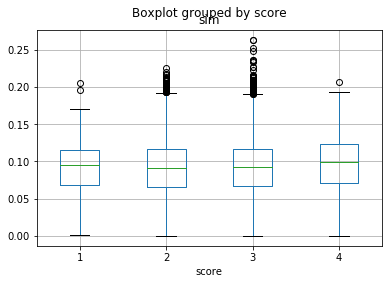

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt

# plt.scatter(genre_dist['sim'], genre_dist['score'])
genre_dist.boxplot(column='sim',by='score')

In [135]:
artist_dict = tracks_db[['artist_id','artist_name']].set_index('artist_id').iloc[:, 0].to_dict()

In [139]:
one_user['artist_name'] = one_user.apply(lambda x: artist_dict[x.artist_id], axis=1)

In [142]:
one_user.sort_values('play_count', ascending=False)

,user_id,artist_id,play_count,artist_name
6,0049dafc81298728192fd26feddb8c199f693841,ARAXU5Z1187B98FECD,4.0,Gorillaz
22,0049dafc81298728192fd26feddb8c199f693841,ART50HO1187FB4D0ED,4.0,Abba
0,0049dafc81298728192fd26feddb8c199f693841,AR02YGA1187B9B8AC4,3.0,Bersuit Vergarabat
14,0049dafc81298728192fd26feddb8c199f693841,ARIUA0B1187B9A08D5,3.0,Chambao
5,0049dafc81298728192fd26feddb8c199f693841,AR8SRQ31187FB4D477,3.0,Ten Years After
...,...,...,...,...
23,0049dafc81298728192fd26feddb8c199f693841,ARTW7I31187B9A4CA9,1.0,!!!
7,0049dafc81298728192fd26feddb8c199f693841,ARBLDRW1187B9A05A1,1.0,The Kills
4,0049dafc81298728192fd26feddb8c199f693841,AR5TZFO1187B98E58E,1.0,Jedi Mind Tricks
24,0049dafc81298728192fd26feddb8c199f693841,ARXXACJ1187FB4BFD1,1.0,Trevor Hall


## FIM

In [101]:
FIM_res = pd.read_pickle('ante_cons_FIM.pickle')

In [102]:
FIM_res.head()

,consequents,antecedents,consequent support,antecedent support,support,confidence,lift
105,Usher featuring will.i.am,"(Charttraxx Karaoke, Train, Harmonia)",0.027139,0.010056,0.006134,0.609974,22.475518
104,Usher featuring will.i.am,"(Charttraxx Karaoke, Train, OneRepublic)",0.027139,0.010186,0.006188,0.607464,22.383063
78,Charttraxx Karaoke,"(Train, Harmonia, Florence + The Machine)",0.034798,0.010719,0.007487,0.698488,20.072768
73,Charttraxx Karaoke,"(Train, OneRepublic, Florence + The Machine)",0.034798,0.011098,0.007687,0.692626,19.904293
82,Charttraxx Karaoke,"(Train, Harmonia, OneRepublic)",0.034798,0.011988,0.008181,0.682452,19.611929


In [99]:
artist_db

,term
artist_id,
AR002UA1187B9A637D,garage rock
AR002UA1187B9A637D,country rock
AR002UA1187B9A637D,free jazz
AR002UA1187B9A637D,oi
AR002UA1187B9A637D,space rock
...,...
ARZZZKG1271F573BC4,heavy
ARZZZKG1271F573BC4,dark
ARZZZKG1271F573BC4,instrumental
